In [126]:
#https://data.mendeley.com/datasets/tsy6rbc5d4/1 
# Battineni, Gopi; Amenta, Francesco; Chintalapudi, Nalini (2019), “Data for: MACHINE LEARNING IN MEDICINE: CLASSIFICATION AND PREDICTION OF DEMENTIA BY SUPPORT VECTOR MACHINES (SVM)”, Mendeley Data, V1, doi: 10.17632/tsy6rbc5d4.1

In [171]:
#dependencies
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


In [128]:
#read in XLXS file
df_dementia = pd.read_excel('./Resources/oasis_longitudinal_demographics.xlsx')
df_dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [129]:
df_dementia.drop(columns = ['Subject ID','MRI ID', 'Visit','Hand'], inplace = True)
df_dementia.head()


,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,Demented,0,M,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,Demented,560,M,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,Demented,1895,M,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


In [130]:
df_dementia_converted_group = df_dementia.loc[df_dementia['Group'] == 'Converted']
df_dementia = df_dementia.drop(df_dementia_converted_group.index)

In [131]:
df_dementia

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0,M,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,Nondemented,457,M,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,Demented,0,M,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,Demented,560,M,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,Demented,1895,M,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,842,M,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,Demented,2297,M,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,Nondemented,0,F,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,Nondemented,763,F,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [132]:
#find na values
missing_values = df_dementia.isna()
print(missing_values.sum())

Group        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64


In [133]:
#fill in missing values and check
df_dementia.SES.fillna(df_dementia.SES.mode()[0], inplace=True)
df_dementia.MMSE.fillna(df_dementia.MMSE.mean(), inplace=True)
#check na values
missing_values = df_dementia.isna()
print(missing_values.sum())

Group       0
MR Delay    0
M/F         0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64


In [134]:
mapping_group = {"Demented": 1, "Nondemented": 0}
mapping_gender = {"M": 0, "F":1}

df_dementia['Group'] = df_dementia['Group'].map(mapping_group)
df_dementia['M/F'] = df_dementia['M/F'].map(mapping_gender)

In [135]:
df_dementia.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,0,457,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,0,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,1,560,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,1,1895,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [136]:
# Define features set
X = df_dementia.copy()
X.drop("Group", axis =1, inplace= True)
X.head()

,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,457,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,0,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,560,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,1895,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [137]:
# Define target vector
y = df_dementia['Group'].values.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [138]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [139]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [140]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [141]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Fitting the Random Forest Model

In [142]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

In [143]:
print(y_train.shape)
print(X_train_scaled.shape)

(252, 1)
(252, 10)


In [144]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

# Making Predictions Using the Random Forest Model

In [145]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Model Evaluation

In [146]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [147]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,48,0
Actual 1,0,36


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        36

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [170]:
# save the results to txt file
file_path = "./Classification-Models/classification_report_with_scales"
with open(file_path, 'w') as f:
    print("Confusion Matrix", file=f)
    print(f"Accuracy Score : {acc_score}", file=f)
    print("Classification Report", file=f)
    print(classification_report(y_test, predictions), file=f)

# Feature Importance

In [148]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.6434612052204338, 'CDR'),
 (0.17074403397115862, 'MMSE'),
 (0.0483245287158129, 'nWBV'),
 (0.027845012432676345, 'EDUC'),
 (0.025994561719305757, 'eTIV'),
 (0.02454895548911879, 'ASF'),
 (0.023314327251583687, 'Age'),
 (0.013582282100552439, 'M/F'),
 (0.013519261513906781, 'MR Delay'),
 (0.008665831585450813, 'SES')]

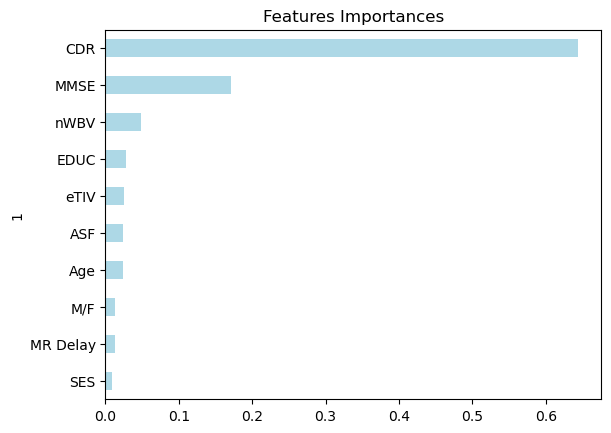

In [172]:
# Visualize the features by importance
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightblue', title= 'Features Importances', legend=False)
# Save the figure
file_path = "./Classification-Models/feature_importances_with_rating_scales.jpg"
plt.savefig(file_path)

In [150]:
df_dementia.to_csv('./Resources/cleaned_dementia_with_rating_scales.csv', index = True)

# Without rating scales


In [151]:
#Create a copy of dataframe
df_dementia_no_rscales = df_dementia.copy()
df_dementia_no_rscales.head()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,0,457,0,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,1,0,0,75,12,2.0,23.0,0.5,1678.290000,0.736336,1.045710
3,1,560,0,76,12,2.0,28.0,0.5,1737.620000,0.713402,1.010000
4,1,1895,0,80,12,2.0,22.0,0.5,1697.911134,0.701236,1.033623


In [152]:
#Drop MMSE and CDR columns 
df_dementia_no_rscales.drop(columns = ['MMSE', 'CDR'], inplace = True)
df_dementia_no_rscales.head()

,Group,MR Delay,M/F,Age,EDUC,SES,eTIV,nWBV,ASF
0,0,0,0,87,14,2.0,1986.550000,0.696106,0.883440
1,0,457,0,88,14,2.0,2004.479526,0.681062,0.875539
2,1,0,0,75,12,2.0,1678.290000,0.736336,1.045710
3,1,560,0,76,12,2.0,1737.620000,0.713402,1.010000
4,1,1895,0,80,12,2.0,1697.911134,0.701236,1.033623


In [153]:
# Define features set
X_2 = df_dementia_no_rscales.copy()
X_2.drop("Group", axis =1, inplace= True)
X_2.head()

,MR Delay,M/F,Age,EDUC,SES,eTIV,nWBV,ASF
0,0,0,87,14,2.0,1986.550000,0.696106,0.883440
1,457,0,88,14,2.0,2004.479526,0.681062,0.875539
2,0,0,75,12,2.0,1678.290000,0.736336,1.045710
3,560,0,76,12,2.0,1737.620000,0.713402,1.010000
4,1895,0,80,12,2.0,1697.911134,0.701236,1.033623


In [154]:
# Define target vector
y_2 = df_dementia_no_rscales['Group'].values.reshape(-1,1)
y_2[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [155]:
# Splitting into Train and Test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42)

In [156]:
# Creating StandardScaler instance
scaler_2 = StandardScaler()

In [157]:
# Fitting Standard Scaller
X_scaler_2 = scaler_2.fit(X_train_2)

In [158]:
# Scaling data
X_train_scaled_2 = X_scaler_2.transform(X_train_2)
X_test_scaled_2 = X_scaler_2.transform(X_test_2)

# Fitting the Random Forest Model to No Rating Scales

In [159]:
# Create a random forest classifier
rf_model_2 = RandomForestClassifier(n_estimators=300, random_state=42)

In [160]:
print(y_train_2.shape)
print(X_train_scaled_2.shape)

(252, 1)
(252, 8)


In [161]:
# Fitting the model
rf_model_2 = rf_model_2.fit(X_train_scaled_2, y_train_2.ravel())

# Making Predictions Using the Random Forest Model with No Rating Scales

In [162]:
# Making predictions using the testing data
predictions_2 = rf_model_2.predict(X_test_scaled_2)

# Model Evaluation

In [163]:
# Calculating the confusion matrix
cm_2 = confusion_matrix(y_test_2, predictions_2)
cm_df_2 = pd.DataFrame(
    cm_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test_2, predictions_2)

In [164]:
# Displaying results
print("Confusion Matrix")
display(cm_df_2)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test_2, predictions_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,41,7
Actual 1,8,28


Accuracy Score : 0.8214285714285714
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.80      0.78      0.79        36

    accuracy                           0.82        84
   macro avg       0.82      0.82      0.82        84
weighted avg       0.82      0.82      0.82        84



In [169]:
# save the results to txt file
file_path = "./Classification-Models/classification_report_no_scales"
with open(file_path, 'w') as f:
    print("Confusion Matrix", file=f)
    print(f"Accuracy Score : {acc_score_2}", file=f)
    print("Classification Report", file=f)
    print(classification_report(y_test_2, predictions_2), file=f)

# Feature Importance with no Rating Scales

In [165]:
# Get the feature importance array
importances_2 = rf_model_2.feature_importances_
# List the top 10 most important features
importances_sorted_2 = sorted(zip(rf_model_2.feature_importances_, X_2.columns), reverse=True)
importances_sorted_2[:10]

[(0.21104948905383533, 'nWBV'),
 (0.16036754179271334, 'ASF'),
 (0.15977293008585494, 'eTIV'),
 (0.1352665221608541, 'EDUC'),
 (0.12932336945077666, 'Age'),
 (0.09481857334128936, 'MR Delay'),
 (0.056351035782287236, 'SES'),
 (0.05305053833238912, 'M/F')]

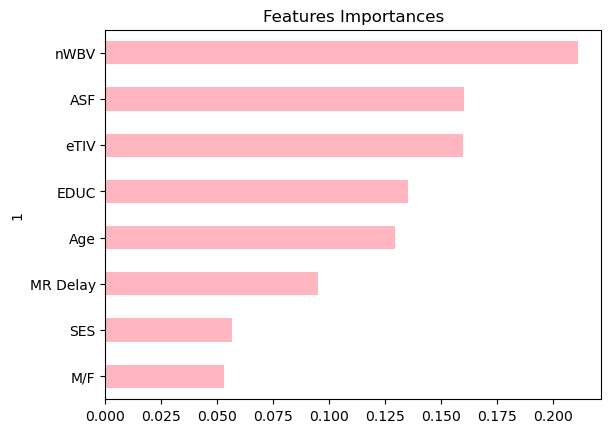

In [173]:
# Visualize the features by importance
# Visualize the features by importance
importances_df_2 = pd.DataFrame(sorted(zip(rf_model_2.feature_importances_, X_2.columns), reverse=True))
importances_df_2.set_index(importances_df_2[1], inplace=True)
importances_df_2.drop(columns=1, inplace=True)
importances_df_2.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted_2 = importances_df_2.sort_values(by='Feature Importances')
importances_sorted_2.plot(kind='barh', color='lightpink', title= 'Features Importances', legend=False)
# Save the figure
file_path = "./Classification-Models/feature_importances_no_rating_scales.jpg"
plt.savefig(file_path)